In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import PIL
import io ,os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import pathlib

In [2]:
預設檔案目錄 ="C:\\Users\\qk123"
os.chdir(預設檔案目錄)
預設檔案目錄 = os.getcwd()

In [3]:
os.getcwd()

'C:\\Users\\qk123'

In [4]:
os.chdir(預設檔案目錄+"\Tsign2")
os.getcwd()

'C:\\Users\\qk123\\Tsign2'

In [5]:
訓練資料目錄 = os.getcwd()
訓練資料目錄

'C:\\Users\\qk123\\Tsign2'

In [6]:
data_dir = pathlib.Path(訓練資料目錄)
data_dir

WindowsPath('C:/Users/qk123/Tsign2')

In [7]:
data_dir.glob('*/*.png')

<generator object Path.glob at 0x0000021A44F04580>

In [8]:
list(data_dir.glob('*/*.png'))

[WindowsPath('C:/Users/qk123/Tsign2/L/L_01.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/L/L_02.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/L/L_03.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/L/L_04.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/L/L_05.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/L/L_06.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/L/L_07.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/L/L_08.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/L/L_09.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/L/L_10.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/L/L_11.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/L/L_12.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/L/L_13.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/L/L_14.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/L/L_15.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/L/L_16.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/L/L_17.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/L/L_18.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/L/L_19.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/L/L_20.PNG'),


In [9]:
R = list(data_dir.glob('R/*'))
R

[WindowsPath('C:/Users/qk123/Tsign2/R/R_01.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/R/R_02.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/R/R_03.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/R/R_04.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/R/R_05.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/R/R_06.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/R/R_07.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/R/R_08.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/R/R_09.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/R/R_10.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/R/R_11.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/R/R_12.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/R/R_13.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/R/R_14.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/R/R_15.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/R/R_16.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/R/R_17.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/R/R_18.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/R/R_19.PNG'),
 WindowsPath('C:/Users/qk123/Tsign2/R/R_20.PNG'),


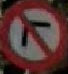

In [10]:
PIL.Image.open(str(R[0]))

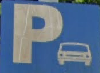

In [11]:
P = list(data_dir.glob('P/*'))
PIL.Image.open(str(P[0]))

In [12]:
#機器學習部分
#準備用tf.keras進行訓練流程
batch_size = 32
img_height = 180
img_width = 180

In [13]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 180 files belonging to 3 classes.
Using 144 files for training.


In [14]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 180 files belonging to 3 classes.
Using 36 files for validation.


In [15]:
class_names = train_ds.class_names
print(class_names)

['L', 'P', 'R']


In [16]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
normalization_layer = layers.Rescaling(1./255)

In [18]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.032271475 0.8116016


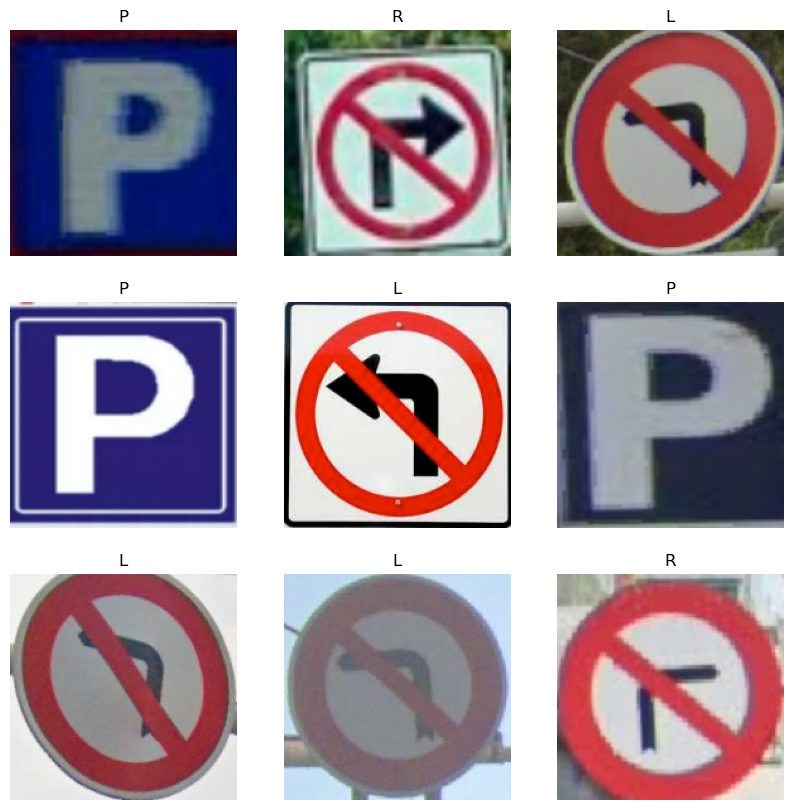

In [19]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [23]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/10
5/5 [==============================] - 3s 460ms/step - loss: 2.3793 - accuracy: 0.2917 - val_loss: 1.0237 - val_accuracy: 0.4722
Epoch 2/10
5/5 [==============================] - 2s 389ms/step - loss: 1.0322 - accuracy: 0.4306 - val_loss: 0.6537 - val_accuracy: 0.6389
Epoch 3/10
5/5 [==============================] - 2s 412ms/step - loss: 0.7857 - accuracy: 0.7639 - val_loss: 0.5610 - val_accuracy: 0.9167
Epoch 4/10
5/5 [==============================] - 2s 357ms/step - loss: 0.6518 - accuracy: 0.7778 - val_loss: 0.4264 - val_accuracy: 0.8611
Epoch 5/10
5/5 [==============================] - 2s 339ms/step - loss: 0.5094 - accuracy: 0.8056 - val_loss: 0.2985 - val_accuracy: 0.8889
Epoch 6/10
5/5 [==============================] - 2s 352ms/step - loss: 0.3706 - accuracy: 0.9167 - val_loss: 0.1681 - val_accuracy: 0.9444
Epoch 7/10
5/5 [==============================] - 2s 378ms/step - loss: 0.2211 - accuracy: 0.9375 - val_loss: 0.0777 - val_accuracy: 1.0000
Epoch 8/10
5/5 [====

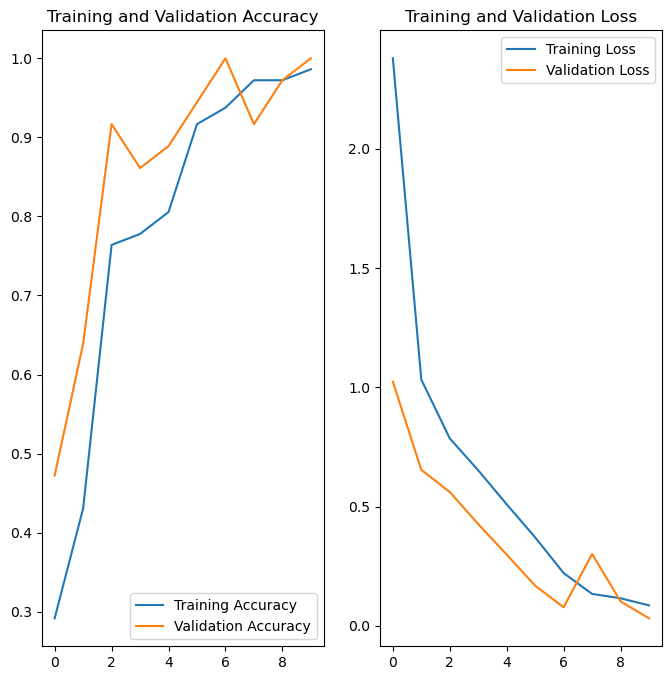

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

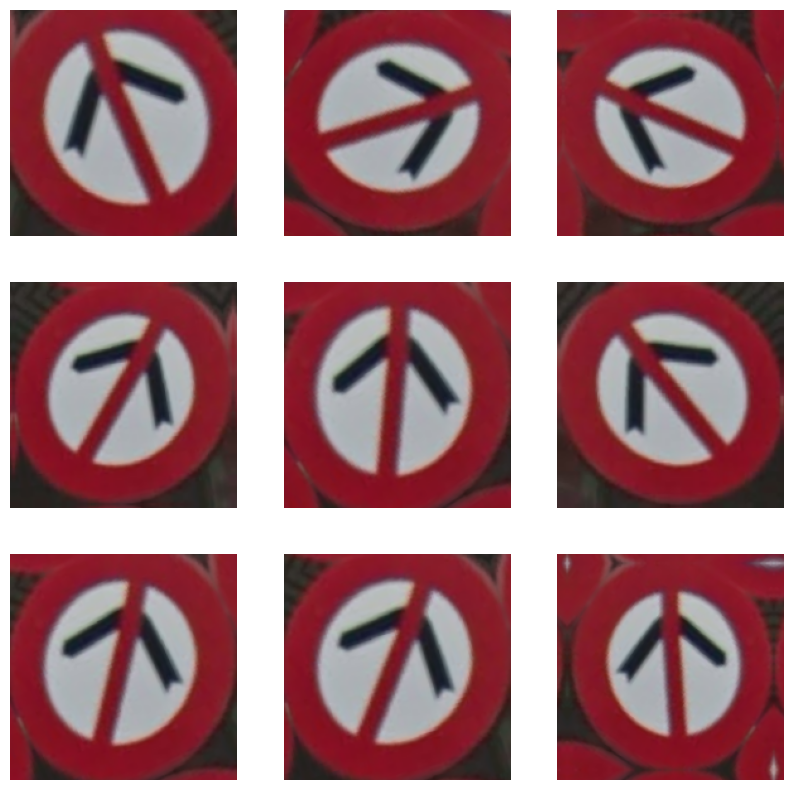

In [26]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [33]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [30]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
5/5 [==============================] - 3s 447ms/step - loss: 2.1431 - accuracy: 0.4028 - val_loss: 1.0772 - val_accuracy: 0.4722
Epoch 2/15
5/5 [==============================] - 2s 451ms/step - loss: 1.0121 - accuracy: 0.3333 - val_loss: 0.6686 - val_accuracy: 0.6944
Epoch 3/15
5/5 [==============================] - 2s 433ms/step - loss: 0.8221 - accuracy: 0.5625 - val_loss: 0.5460 - val_accuracy: 0.7222
Epoch 4/15
5/5 [==============================] - 2s 467ms/step - loss: 0.6819 - accuracy: 0.6250 - val_loss: 0.4341 - val_accuracy: 0.6944
Epoch 5/15
5/5 [==============================] - 2s 438ms/step - loss: 0.6089 - accuracy: 0.6597 - val_loss: 0.3811 - val_accuracy: 0.7500
Epoch 6/15
5/5 [==============================] - 3s 555ms/step - loss: 0.6066 - accuracy: 0.6458 - val_loss: 0.4701 - val_accuracy: 0.6944
Epoch 7/15
5/5 [==============================] - 3s 601ms/step - loss: 0.5890 - accuracy: 0.6875 - val_loss: 0.4046 - val_accuracy: 0.6944
Epoch 8/15
5/5 [====

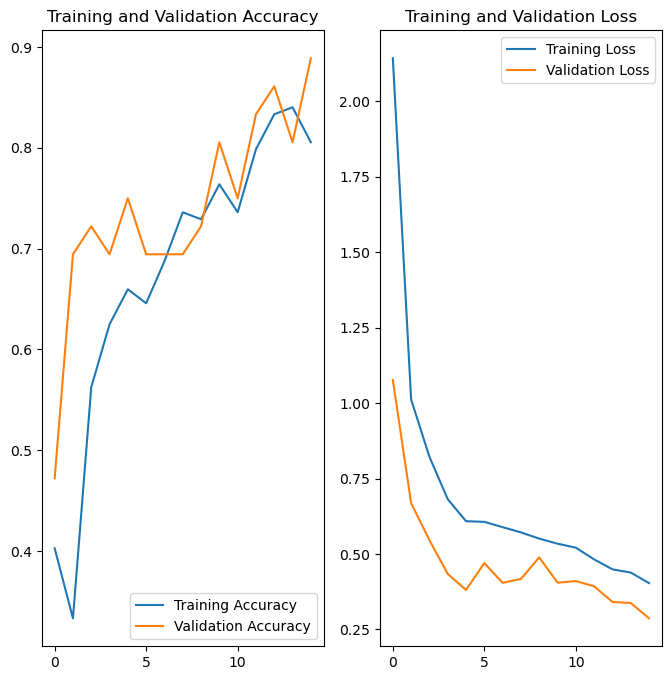

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
Tsign2_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQJIL1eFum-r_lQXO-R_QawBUstxft4-Tjma8AR73eSaqtScJX_5XmeycuN_bOvprbfbYY&usqp=CAU"
Tsign2_path = tf.keras.utils.get_file('PLR_Tsign2', origin=Tsign2_url)

img = tf.keras.utils.load_img(
    Tsign2_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 76ms/step
This image most likely belongs to R with a 34.50 percent confidence.
